In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from PIL import Image
np.random.seed(42)
sys.path.append("/home/moritz/repositories/fair_leak/")

In [3]:
base_dir = Path("/home/moritz/data/fitzpatrick17k/")
fitz = pd.read_csv('/home/moritz/repositories/fair_leak/data/csv/fitzpatrick17k.csv')
fitz.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum,download_success,split,Fitzatrick Skin Type,Fitzpatrick Skin Type
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...,True,train,Type III/IV,Type III/IV
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...,True,train,Type I/II,Type I/II
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...,True,train,Type I/II,Type I/II
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,True,train,Type I/II,Type I/II
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,True,train,Type I/II,Type I/II


In [4]:
# we get rid of these weird MRI/Xray images (how did they even end up in here?)
fitz.loc[fitz['md5hash']=='2ea034fc482e9bd21a5dfa2506cc5d6b', 'download_success'] = False
fitz.loc[fitz['md5hash']=='bccab73c32aba48c90602de9bb458272', 'download_success'] = False
fitz.loc[fitz['md5hash']=='e69165b3455bb3a5a8b33a0f6fd8a1d3', 'download_success'] = False

In [5]:
fitz.download_success.value_counts()

download_success
True    16523
Name: count, dtype: int64

In [6]:
fitz = fitz[fitz.download_success==True]

<Axes: xlabel='fitzpatrick_scale'>

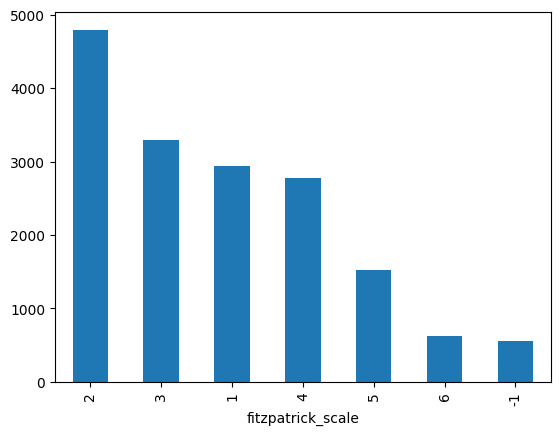

In [7]:
fitz['fitzpatrick_scale'].value_counts().plot(kind='bar')

In [8]:
# group together Fitzpatrick Skin Types
fitz['Fitzpatrick Skin Type'] = "Unknown"
fitz.loc[fitz["fitzpatrick_scale"]== 1, 'Fitzpatrick Skin Type'] = "Type I/II"
fitz.loc[fitz["fitzpatrick_scale"]== 2, 'Fitzpatrick Skin Type'] = "Type I/II"
fitz.loc[fitz["fitzpatrick_scale"]== 3, 'Fitzpatrick Skin Type'] = "Type III/IV"
fitz.loc[fitz["fitzpatrick_scale"]== 4, 'Fitzpatrick Skin Type'] = "Type III/IV"
fitz.loc[fitz["fitzpatrick_scale"]== 5, 'Fitzpatrick Skin Type'] = "Type V/VI"
fitz.loc[fitz["fitzpatrick_scale"]== 6, 'Fitzpatrick Skin Type'] = "Type V/VI"


<Axes: xlabel='Fitzpatrick Skin Type'>

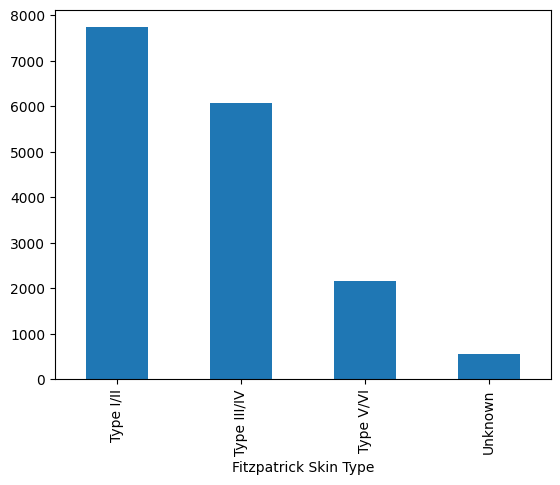

In [9]:
fitz['Fitzpatrick Skin Type'].value_counts().plot(kind='bar')

In [10]:
fitz['Fitzpatrick Skin Type'].value_counts(), fitz['Fitzpatrick Skin Type'].value_counts(normalize=True)

(Fitzpatrick Skin Type
 Type I/II      7737
 Type III/IV    6072
 Type V/VI      2155
 Unknown         559
 Name: count, dtype: int64,
 Fitzpatrick Skin Type
 Type I/II      0.468256
 Type III/IV    0.367488
 Type V/VI      0.130424
 Unknown        0.033832
 Name: proportion, dtype: float64)

In [11]:
def plot_random(df, n=25, title=""):
    fig, axes = plt.subplots(int(np.sqrt(n)), int(np.sqrt(n)), figsize=(5,5)) 
    image_ids = df.sample(n=n)['md5hash']
    for ax, image_id in zip(axes.flat, image_ids):
        ax.set_axis_off()
        img_path = f"{base_dir}/{image_id}.jpg"
        img = Image.open(img_path)
        ax.imshow(img)
    fig.suptitle(title)

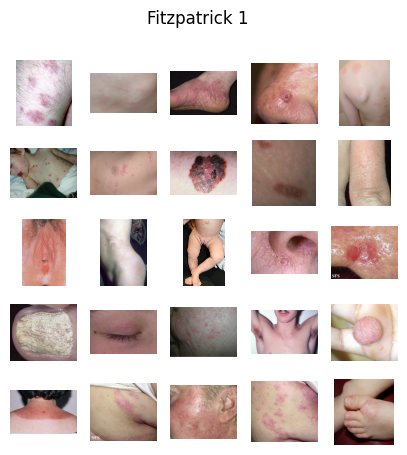

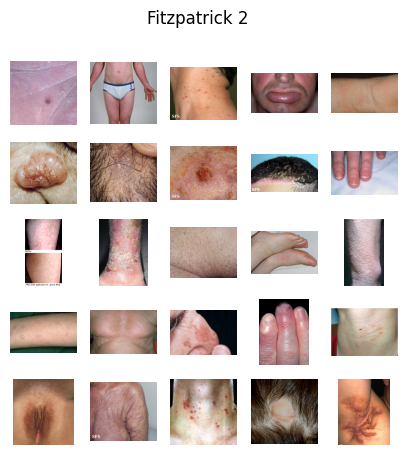

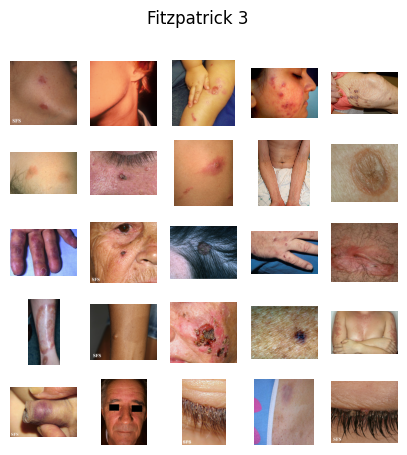

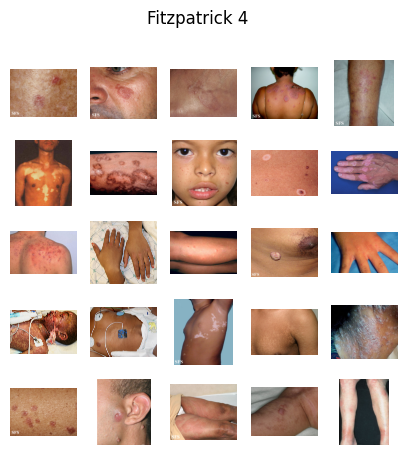

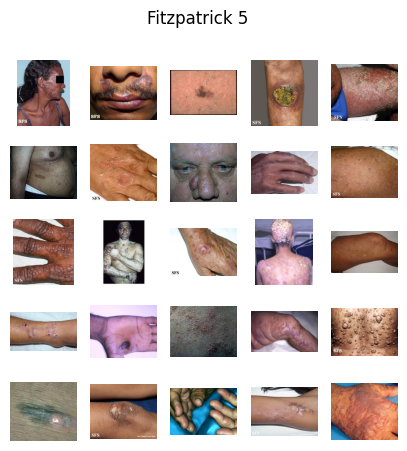

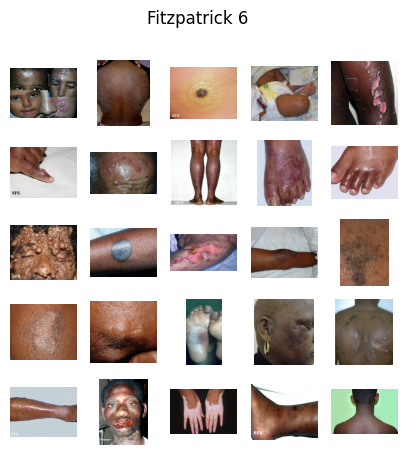

In [12]:
for i in range(1, 7):
    plot_random(fitz[fitz['fitzpatrick_scale'] == i], title=f"Fitzpatrick {i}")
    plt.show()

In [13]:
fitz

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum,download_success,split,Fitzatrick Skin Type,Fitzpatrick Skin Type
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...,True,train,Type III/IV,Type III/IV
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...,True,train,Type I/II,Type I/II
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...,True,train,Type I/II,Type I/II
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,True,train,Type I/II,Type I/II
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,True,train,Type I/II,Type I/II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16518,cd90e491ddaa92f0f4eb07f73aa09f64,5,5,scleroderma,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4529,httpwwwatlasdermatologicocombrimgimageId4529.jpg,True,train,Type V/VI,Type V/VI
16519,5f1ed6de6a9110d7dc580a6a0312af63,4,5,pityriasis rosea,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=5630,httpwwwatlasdermatologicocombrimgimageId5630.jpg,True,train,Type III/IV,Type III/IV
16520,f198aaf1f0550c2464b285454d34926e,3,3,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4609,httpwwwatlasdermatologicocombrimgimageId4609.jpg,True,train,Type III/IV,Type III/IV
16521,6214de2e915835014235a1839cbc5938,-1,5,vitiligo,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=7930,httpwwwatlasdermatologicocombrimgimageId7930.jpg,True,train,Unknown,Unknown


## Label Distribution

<Axes: xlabel='nine_partition_label'>

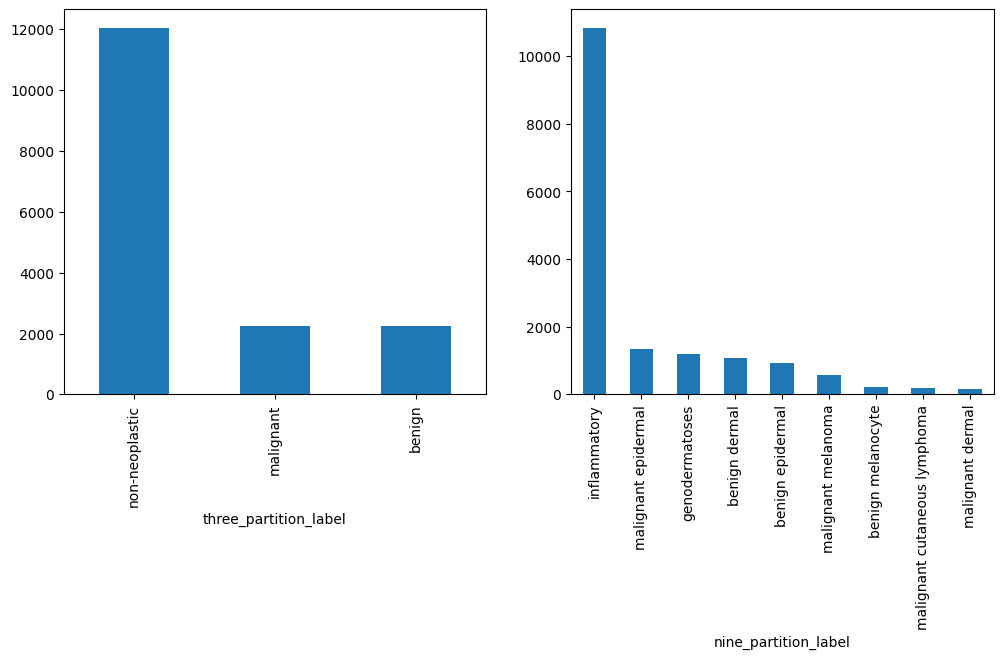

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fitz['three_partition_label'].value_counts().plot(kind='bar', ax=axes[0])
fitz['nine_partition_label'].value_counts().plot(kind='bar', ax=axes[1])

## Train-test split

In [9]:
fitz.qc.value_counts() # qc= "1 Diagnostic" is the set of images expert-verifed labels

qc
1 Diagnostic          348
5 Potentially          97
2 Characteristic       32
3 Wrongly labelled     17
4 Other                10
Name: count, dtype: int64

In [10]:
# only use diagnotically verified images for test-set
test_idcs = fitz[fitz.qc == "1 Diagnostic"]['md5hash']
fitz['split'] = 'train'
print(f" {len(test_idcs)} images in test-set")
fitz.loc[fitz['md5hash'].isin(test_idcs).values, 'split'] = 'test'

 348 images in test-set


In [11]:
fitz['split'].value_counts()

split
train    16175
test       348
Name: count, dtype: int64

In [12]:
#fitz.to_csv('/home/moritz/repositories/med_leak/data/csv/fitzpatrick17k.csv', index=False)